# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [50]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,amy,andrew,anthony,bill,bo,chris,dave,ellen,hasan,...,joe,john,louis,matt,mike,nate,ricky,sarah,sebastian,taylor
aaaaah,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,1,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
abc,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict    

{'ali': [('like', 127),
  ('im', 71),
  ('just', 64),
  ('know', 63),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 15),
  ('need', 14),
  ('god', 14),
  ('hes', 14),
  ('pregnant', 14),
  ('tell', 13),
  ('yeah', 13),
  ('work', 12),
  ('really', 12)],
 'amy': [('like', 109),
  ('know', 77),
  ('just', 58),
  ('im', 49),
  ('okay', 42),
  ('dont', 40),
  ('right', 31),
  ('uh', 28),
  ('thats', 23),
  ('youre', 23),
  ('hes', 20),
  ('said', 20),
  ('yeah', 20),
  ('think', 18),
  ('got', 15),
  ('oh', 15),
  ('husband', 15),
  ('thank', 14),
  ('love', 14),
  ('people', 13),
  ('feel', 13),
  ('fuck', 13),
  ('gonna', 13),
  ('really', 13),
  ('want', 12),
  ('good', 12),
  ('didnt', 11),
  ('way', 11),
  ('doing', 10),
  ('sex', 10)],
 'andrew'

In [52]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, just, know, dont, thats, shit, youre, gonna, ok, lot, wanna, gotta, oh
---
amy
like, know, just, im, okay, dont, right, uh, thats, youre, hes, said, yeah, think
---
andrew
like, know, im, thats, dont, got, man, want, shit, right, guy, youre, people, gonna
---
anthony
im, like, know, dont, joke, got, thats, said, just, anthony, say, day, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
transcriptsgeorge, movie, transcriptstv, seriestv, interviewsmusichistorybooksopinions, privacy, comedy, email, transcriptscomedystandup, moviesmovie, scraps, chappelleinterviewsplayboy, weekly, search
---
chris
like, man, know, right, thats, im, shit, got, fuck, just, ok, youre, god, kids
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---
ellen
im, like, just, dont, people, know, think, said, time, thats, youre, ellen, say, really
---
hasan
transcriptsgeorge, movie, transcrip

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [53]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'oh',
 'husband',
 'got',
 'right',
 'time',
 'cause',
 'day',
 'women',
 'people',
 'need',
 'god',
 'hes',
 'pregnant',
 'tell',
 'yeah',
 'work',
 'really',
 'like',
 'know',
 'just',
 'im',
 'okay',
 'dont',
 'right',
 'uh',
 'thats',
 'youre',
 'hes',
 'said',
 'yeah',
 'think',
 'got',
 'oh',
 'husband',
 'thank',
 'love',
 'people',
 'feel',
 'fuck',
 'gonna',
 'really',
 'want',
 'good',
 'didnt',
 'way',
 'doing',
 'sex',
 'like',
 'know',
 'im',
 'thats',
 'dont',
 'got',
 'man',
 'want',
 'shit',
 'right',
 'guy',
 'youre',
 'people',
 'gonna',
 'good',
 'guys',
 'just',
 'say',
 'really',
 'fuck',
 'okay',
 'thing',
 'theyre',
 'black',
 'cause',
 'think',
 'hey',
 'gay',
 'come',
 'bad',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'just',
 'anthony',
 'say',
 'day',
 'guys',
 'people',
 'tell',
 'youre',
 'right',
 'grandma',
 'jo

In [54]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 20),
 ('im', 20),
 ('just', 20),
 ('know', 20),
 ('dont', 20),
 ('thats', 20),
 ('right', 20),
 ('youre', 19),
 ('got', 19),
 ('people', 19),
 ('gonna', 18),
 ('think', 16),
 ('good', 12),
 ('oh', 11),
 ('yeah', 11),
 ('really', 11),
 ('time', 10),
 ('theyre', 10),
 ('cause', 9),
 ('hes', 9),
 ('didnt', 9),
 ('theres', 9),
 ('shit', 8),
 ('said', 8),
 ('say', 8),
 ('thing', 8),
 ('going', 8),
 ('day', 7),
 ('fuck', 7),
 ('want', 7),
 ('ive', 7),
 ('fucking', 7),
 ('okay', 6),
 ('doing', 6),
 ('did', 6),
 ('man', 5),
 ('guy', 5),
 ('gotta', 4),
 ('tell', 4),
 ('love', 4),
 ('guys', 4),
 ('come', 4),
 ('make', 4),
 ('kids', 4),
 ('mean', 4),
 ('goes', 4),
 ('ok', 3),
 ('lot', 3),
 ('wanna', 3),
 ('uh', 3),
 ('black', 3),
 ('dude', 3),
 ('life', 3),
 ('old', 3),
 ('went', 3),
 ('little', 3),
 ('husband', 2),
 ('women', 2),
 ('need', 2),
 ('god', 2),
 ('thank', 2),
 ('way', 2),
 ('hey', 2),
 ('gay', 2),
 ('joke', 2),
 ('jokes', 2),
 ('school', 2),
 ('transcriptsgeorge', 2),
 ('mo

In [117]:
data[:'like']

,ali,amy,andrew,anthony,bill,chris,dave,ellen,jim,jimmy,joe,john,louis,matt,mike,nate,ricky,sarah,sebastian,taylor
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
aah,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
abc,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lighting,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
lightning,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
lights,0,2,0,1,0,0,2,2,0,0,0,0,2,0,0,0,0,0,1,0
lightslooking,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [65]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'right',
 'youre',
 'got',
 'people',
 'gonna',
 'think',
 'good',
 'oh',
 'yeah',
 'really',
 'time',
 'theyre',
 'cause',
 'hes',
 'didnt',
 'theres',
 'shit',
 'said',
 'say',
 'thing',
 'going',
 'day',
 'fuck',
 'want',
 'ive',
 'fucking']

In [56]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ali wong baby cobra transcript scraps from th...
amy,amy schumer emergency contact transcript scra...
andrew,andrew santino home field advantage transcrip...
anthony,anthony jeselnik thoughts and prayers full tr...
bill,bill burr im sorry you feel that way full tra...
bo,scraps from the loft skip to content moviesmo...
chris,chris rock tamborine transcript scraps from t...
dave,dave chappelle the age of spin transcript scr...
ellen,ellen degeneres for your approval transcript ...
hasan,scraps from the loft skip to content moviesmo...


In [73]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = list(stop_words)
stop_words

['someone',
 'last',
 'twenty',
 'towards',
 'fucking',
 'take',
 'own',
 'be',
 'cannot',
 'former',
 'us',
 'after',
 'cause',
 'somewhere',
 'though',
 'am',
 'her',
 'you',
 'sometime',
 'get',
 'for',
 'here',
 'like',
 'should',
 'same',
 'shit',
 'through',
 'said',
 'neither',
 'become',
 'much',
 'please',
 'namely',
 'think',
 'several',
 'three',
 'moreover',
 'latterly',
 'during',
 'un',
 'before',
 'system',
 'thick',
 'would',
 'front',
 'noone',
 'see',
 'them',
 'besides',
 'forty',
 'every',
 'whereafter',
 'were',
 'indeed',
 'often',
 'until',
 'mill',
 'therein',
 'detail',
 'whoever',
 'cry',
 'meanwhile',
 'hereupon',
 'sometimes',
 'full',
 'per',
 'around',
 'myself',
 'whenever',
 'going',
 'beyond',
 'could',
 'yourselves',
 'herself',
 'everything',
 'whither',
 'below',
 'where',
 'is',
 'find',
 'many',
 'part',
 'down',
 'off',
 'hence',
 'seem',
 'one',
 'six',
 'behind',
 'had',
 'now',
 'name',
 'again',
 'my',
 'being',
 'just',
 'inc',
 'since',
 'wh

In [74]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [75]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


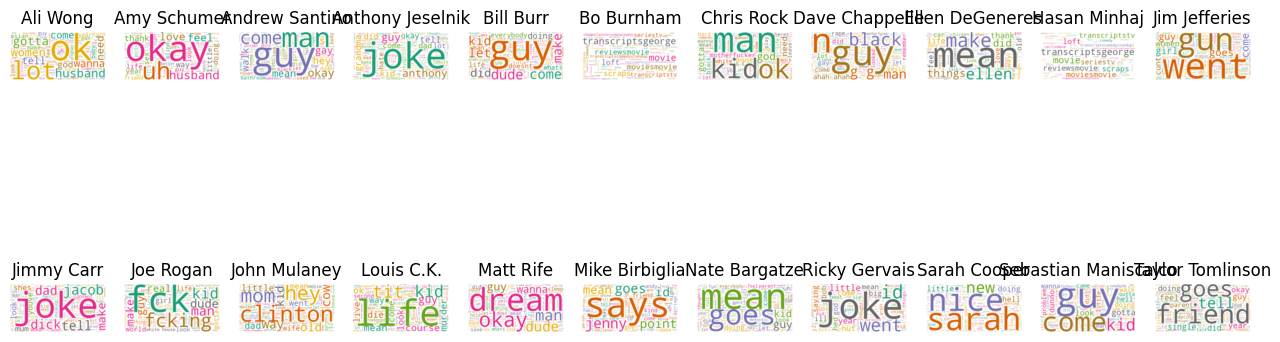

In [76]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Amy Schumer', 'Andrew Santino', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 
              'Chris Rock', 'Dave Chappelle', 'Ellen DeGeneres', 'Hasan Minhaj', 'Jim Jefferies', 
              'Jimmy Carr', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Matt Rife' ,'Mike Birbiglia', 
              'Nate Bargatze', 'Ricky Gervais', 'Sarah Cooper', 'Sebastian Maniscalco', 'Taylor Tomlinson']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(2, 11, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [77]:
data_clean = data_clean.drop(index='bo')
data_clean = data_clean.drop(index='hasan')

In [79]:
data = data.drop(columns='bo')
data = data.drop(columns='hasan')

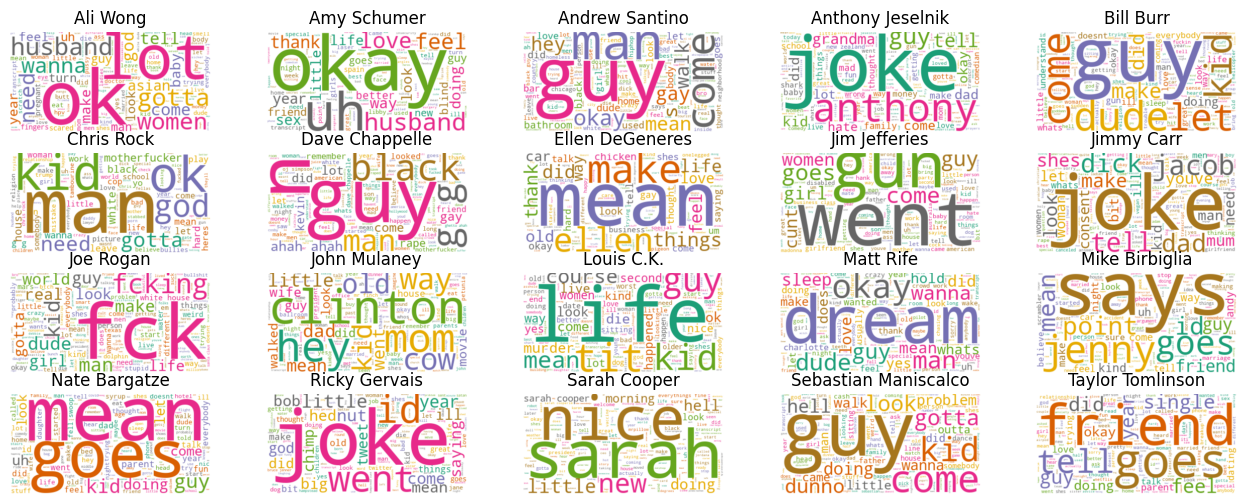

In [81]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Amy Schumer', 'Andrew Santino', 'Anthony Jeselnik', 'Bill Burr',
              'Chris Rock', 'Dave Chappelle', 'Ellen DeGeneres', 'Jim Jefferies', 
              'Jimmy Carr', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Matt Rife' ,'Mike Birbiglia', 
              'Nate Bargatze', 'Ricky Gervais', 'Sarah Cooper', 'Sebastian Maniscalco', 'Taylor Tomlinson']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [82]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Amy Schumer,1104
3,Anthony Jeselnik,1164
5,Chris Rock,1198
12,Louis C.K.,1266
18,Sebastian Maniscalco,1347
15,Nate Bargatze,1401
13,Matt Rife,1448
8,Jim Jefferies,1452
0,Ali Wong,1506
2,Andrew Santino,1527


In [83]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 60, 60, 59, 80, 64, 67, 60, 76, 60, 63, 62, 60, 60, 76, 60, 79, 49, 60, 60]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Amy Schumer,1104,2620,60,43.666667
3,Anthony Jeselnik,1164,3189,59,54.050847
0,Ali Wong,1506,3505,60,58.416667
5,Chris Rock,1198,3790,64,59.218750
12,Louis C.K.,1266,3556,60,59.266667
9,Jimmy Carr,1852,3788,60,63.133333
13,Matt Rife,1448,3813,60,63.550000
7,Ellen DeGeneres,1546,3836,60,63.933333
6,Dave Chappelle,1550,4299,67,64.164179
18,Sebastian Maniscalco,1347,3925,60,65.416667


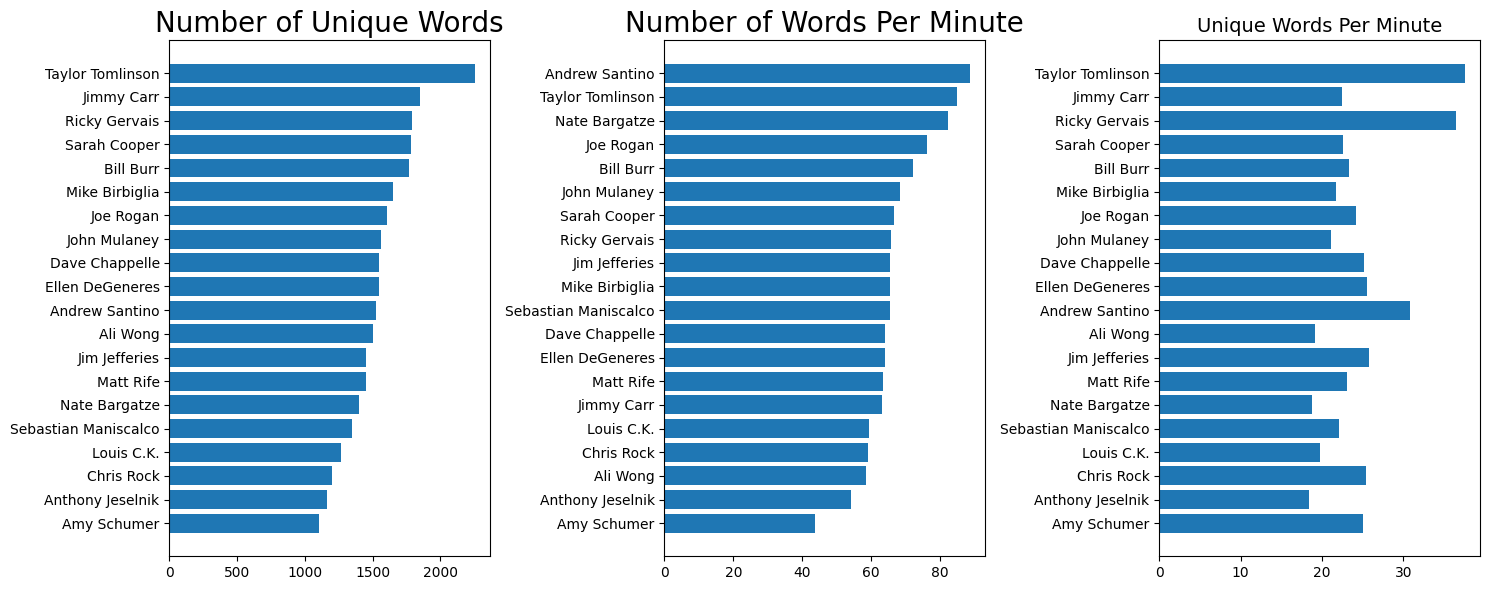

In [88]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.subplot(1, 3, 3)
unique_words_per_minute = data_unique_sort.unique_words / data_wpm_sort.run_times
plt.barh(y_pos, unique_words_per_minute, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Unique Words Per Minute', fontsize=14)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [89]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 20),
 ('im', 20),
 ('just', 20),
 ('know', 20),
 ('dont', 20),
 ('thats', 20),
 ('right', 20),
 ('youre', 19),
 ('got', 19),
 ('people', 19),
 ('gonna', 18),
 ('think', 16),
 ('good', 12),
 ('oh', 11),
 ('yeah', 11),
 ('really', 11),
 ('time', 10),
 ('theyre', 10),
 ('cause', 9),
 ('hes', 9),
 ('didnt', 9),
 ('theres', 9),
 ('shit', 8),
 ('said', 8),
 ('say', 8),
 ('thing', 8),
 ('going', 8),
 ('day', 7),
 ('fuck', 7),
 ('want', 7),
 ('ive', 7),
 ('fucking', 7),
 ('okay', 6),
 ('doing', 6),
 ('did', 6),
 ('man', 5),
 ('guy', 5),
 ('gotta', 4),
 ('tell', 4),
 ('love', 4),
 ('guys', 4),
 ('come', 4),
 ('make', 4),
 ('kids', 4),
 ('mean', 4),
 ('goes', 4),
 ('ok', 3),
 ('lot', 3),
 ('wanna', 3),
 ('uh', 3),
 ('black', 3),
 ('dude', 3),
 ('life', 3),
 ('old', 3),
 ('went', 3),
 ('little', 3),
 ('husband', 2),
 ('women', 2),
 ('need', 2),
 ('god', 2),
 ('thank', 2),
 ('way', 2),
 ('hey', 2),
 ('gay', 2),
 ('joke', 2),
 ('jokes', 2),
 ('school', 2),
 ('transcriptsgeorge', 2),
 ('mo

In [90]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word', ]
data_profanity

,f_word,s_word
ali,16,34
amy,23,5
andrew,59,54
anthony,15,9
bill,107,64
chris,82,54
dave,65,45
ellen,1,0
jim,115,20
jimmy,45,2


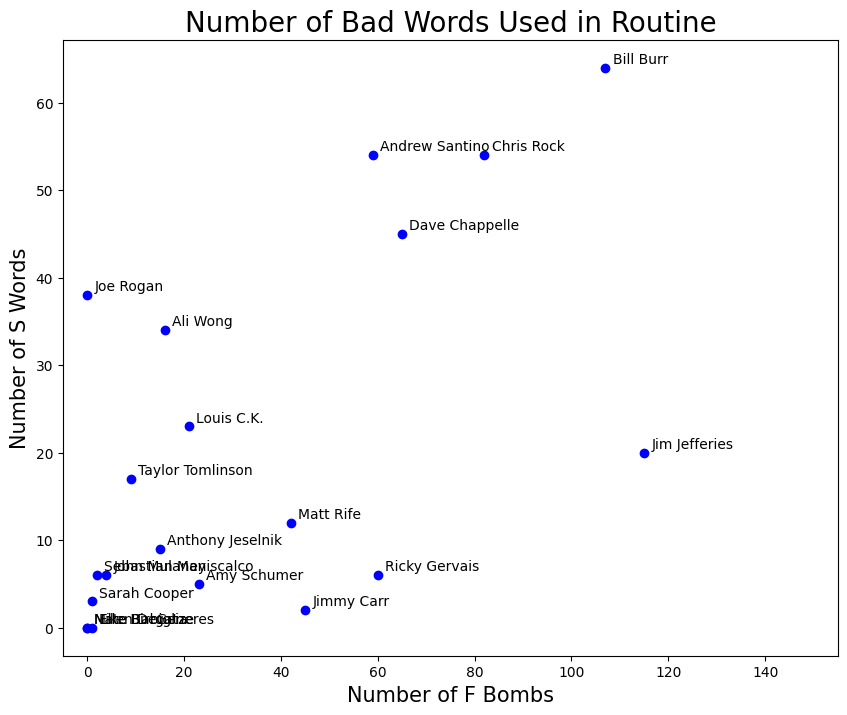

In [91]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

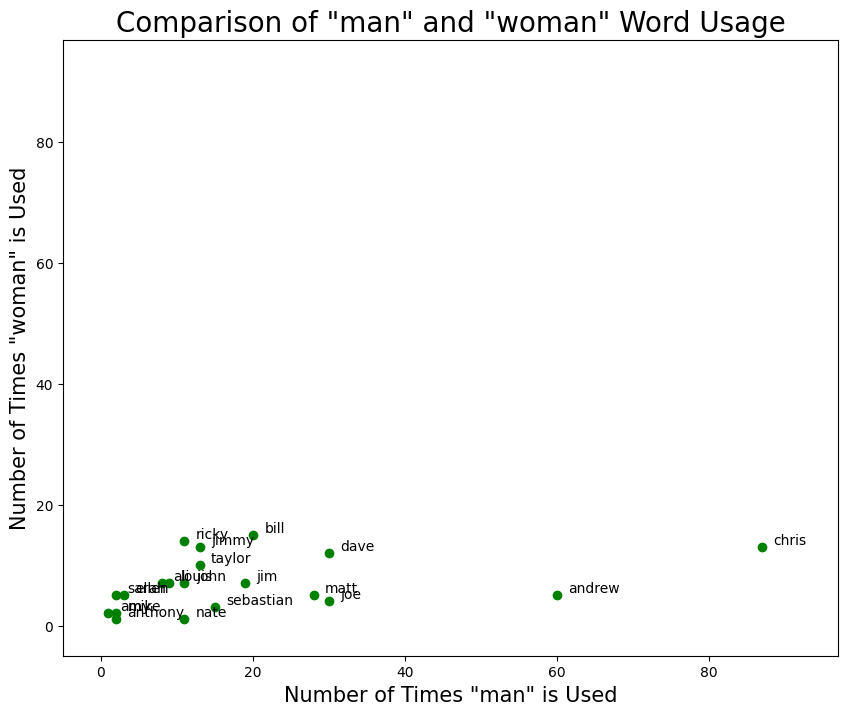

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Transpose data to extract word counts
data_gender = data.transpose()[['man', 'woman']]
data_gender.columns = ['man_count', 'woman_count']

# Set figure size
plt.rcParams['figure.figsize'] = [10, 8]

# Scatter plot
for i, comedian in enumerate(data_gender.index):
    x = data_gender.man_count.loc[comedian]
    y = data_gender.woman_count.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+1.5, y+0.5, comedian, fontsize=10)
    plt.xlim(-5, max(data_gender.man_count) + 10)
    plt.ylim(-5, max(data_gender.man_count) + 10)

plt.title('Comparison of "man" and "woman" Word Usage', fontsize=20)
plt.xlabel('Number of Times "man" is Used', fontsize=15)
plt.ylabel('Number of Times "woman" is Used', fontsize=15)

plt.show()


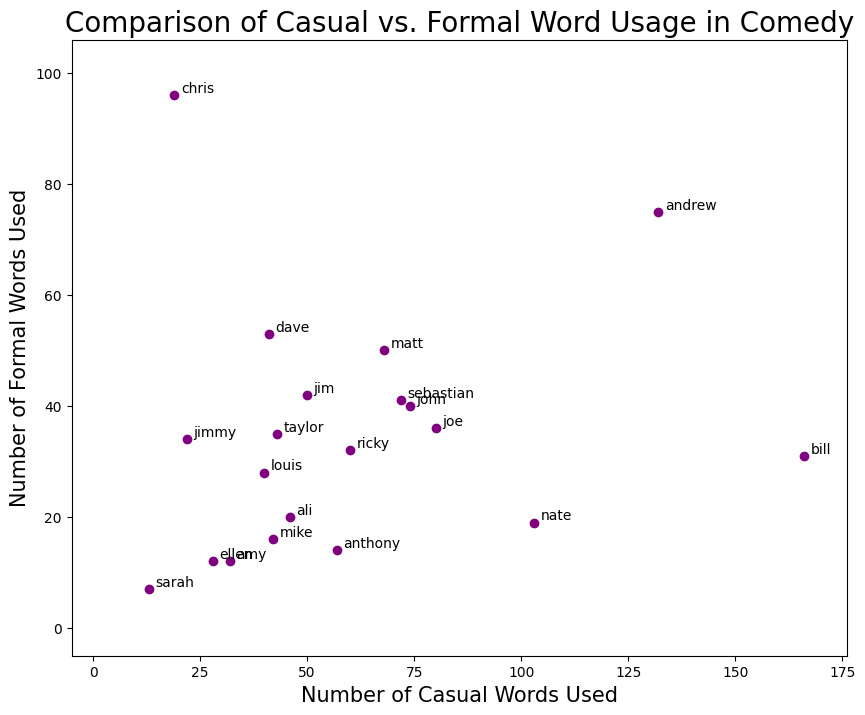

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Define casual and formal words for comparison
casual_words = ["guy", "dude", "kid", "yeah", "buddy", "mom", "dad", "bro"]
formal_words = ["man", "gentleman", "child", "yes", "friend", "mother", "father", "brother"]

# Transpose data to extract word counts
data_speech = data.transpose()[casual_words + formal_words]

# Sum occurrences of casual and formal words
data_speech["casual_count"] = data_speech[casual_words].sum(axis=1)
data_speech["formal_count"] = data_speech[formal_words].sum(axis=1)

# Set figure size
plt.rcParams['figure.figsize'] = [10, 8]

# Scatter plot
for i, comedian in enumerate(data_speech.index):
    x = data_speech.casual_count.loc[comedian]
    y = data_speech.formal_count.loc[comedian]
    plt.scatter(x, y, color='purple')
    plt.text(x + 1.5, y + 0.5, comedian, fontsize=10)
    plt.xlim(-5, max(data_speech.casual_count) + 10)
    plt.ylim(-5, max(data_speech.formal_count) + 10)

plt.title('Comparison of Casual vs. Formal Word Usage in Comedy', fontsize=20)
plt.xlabel('Number of Casual Words Used', fontsize=15)
plt.ylabel('Number of Formal Words Used', fontsize=15)

plt.show()


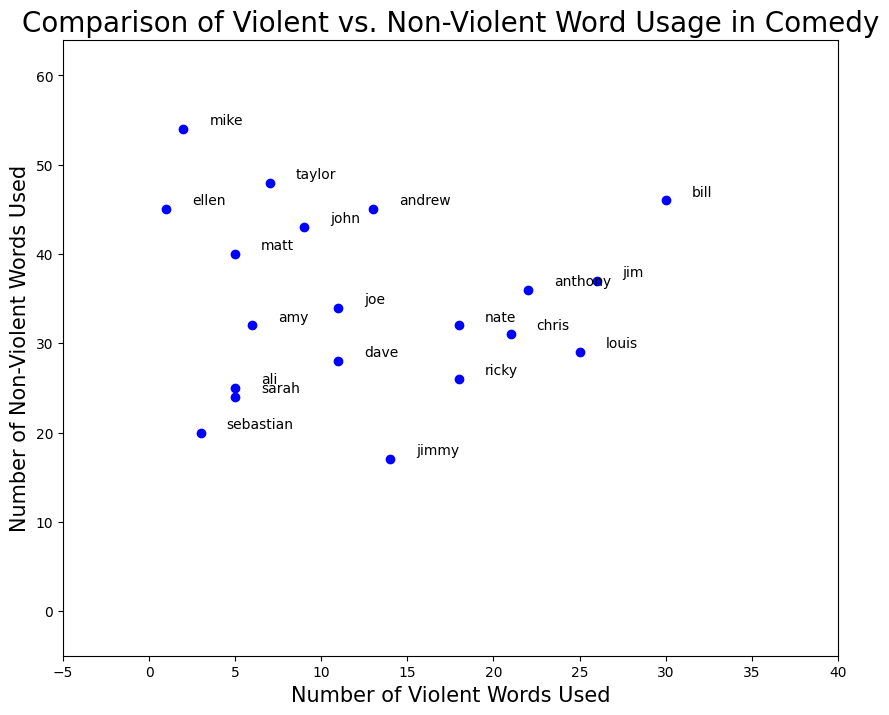

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Define violent and non-violent words
violent_words = ["murder", "gun", "kill", "shoot", "death", "fight", "blood", "attack", "crime"]
non_violent_words = ["love", "peace", "happy", "friend", "family", "kind", "joy", "help", "care"]

# Transpose data to extract word counts
data_violence = data.transpose()[violent_words + non_violent_words]

# Sum occurrences of violent and non-violent words
data_violence["violent_count"] = data_violence[violent_words].sum(axis=1)
data_violence["non_violent_count"] = data_violence[non_violent_words].sum(axis=1)

# Set figure size
plt.rcParams['figure.figsize'] = [10, 8]

# Scatter plot
for i, comedian in enumerate(data_violence.index):
    x = data_violence.violent_count.loc[comedian]
    y = data_violence.non_violent_count.loc[comedian]
    plt.scatter(x, y, color='red' if x > y else 'blue')  # Red if more violent words, Blue if more non-violent words
    plt.text(x + 1.5, y + 0.5, comedian, fontsize=10)
    plt.xlim(-5, max(data_violence.violent_count) + 10)
    plt.ylim(-5, max(data_violence.non_violent_count) + 10)

plt.title('Comparison of Violent vs. Non-Violent Word Usage in Comedy', fontsize=20)
plt.xlabel('Number of Violent Words Used', fontsize=15)
plt.ylabel('Number of Non-Violent Words Used', fontsize=15)

plt.show()


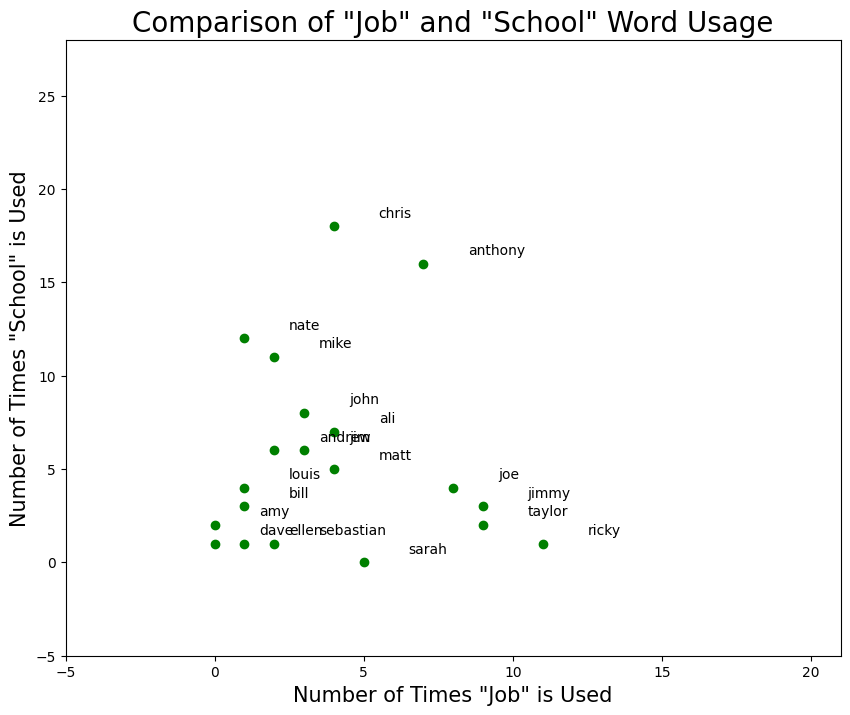

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Transpose data to extract word counts
data_emotions = data.transpose()[['job', 'school']]
data_emotions.columns = ['job_count', 'school_count']

# Set figure size
plt.rcParams['figure.figsize'] = [10, 8]

# Scatter plot
for i, comedian in enumerate(data_emotions.index):
    x = data_emotions.job_count.loc[comedian]
    y = data_emotions.school_count.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+1.5, y+0.5, comedian, fontsize=10)
    plt.xlim(-5, max(data_emotions.job_count) + 10)
    plt.ylim(-5, max(data_emotions.school_count) + 10)

plt.title('Comparison of "Job" and "School" Word Usage', fontsize=20)
plt.xlabel('Number of Times "Job" is Used', fontsize=15)
plt.ylabel('Number of Times "School" is Used', fontsize=15)

plt.show()

